### Decision Tree

In [47]:
import pandas as pd

file_path = 'datakaryawan.csv'
data = pd.read_csv(file_path)

data_encoded = data.copy()

for column in ['Department', 'Usia', 'Gaji', 'Status']:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

data_encoded

,Department,Status,Usia,Gaji,Jumlah
0,1,1,2,5,30
1,1,0,1,0,40
2,1,0,2,1,40
3,3,0,0,5,20
4,3,1,2,6,5
5,3,0,1,5,3
6,3,1,4,6,3
7,0,1,3,5,10
8,0,0,2,4,4
9,2,1,5,3,4


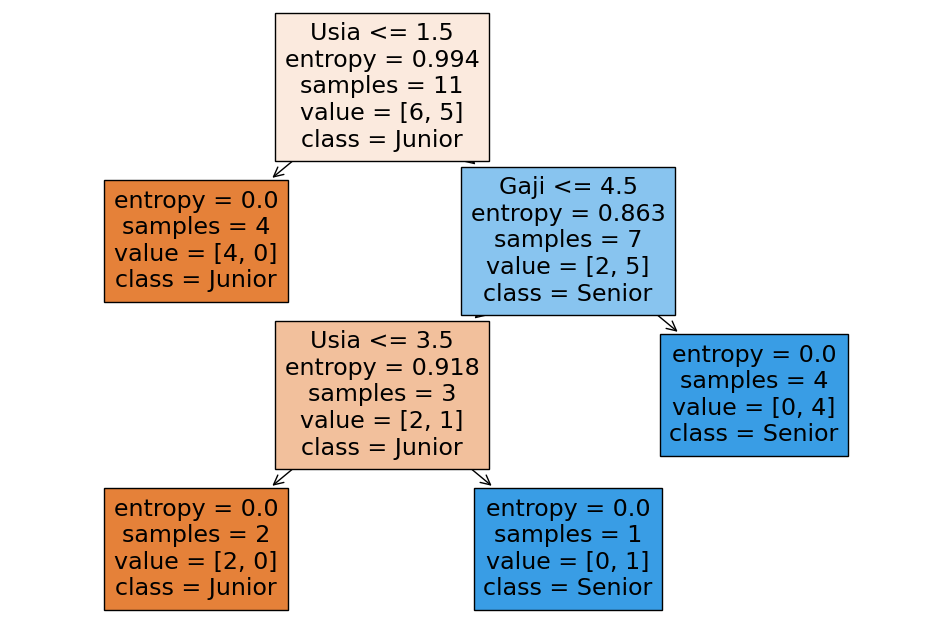

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = data_encoded[['Department', 'Usia', 'Gaji', 'Jumlah']]
y = data_encoded['Status']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['Department', 'Usia', 'Gaji', 'Jumlah'], class_names=['Junior', 'Senior'], filled=True)
plt.show()



### Rules-based Classification

In [57]:
from sklearn.tree import export_text

# Ekstraksi rules
tree_rules = export_text(clf, feature_names=['Department', 'Usia', 'Gaji', 'Jumlah'])
print(tree_rules)

|--- Usia <= 1.50
|   |--- class: 0
|--- Usia >  1.50
|   |--- Gaji <= 4.50
|   |   |--- Department <= 1.50
|   |   |   |--- class: 0
|   |   |--- Department >  1.50
|   |   |   |--- class: 1
|   |--- Gaji >  4.50
|   |   |--- class: 1



### Naive Bayes Classification

In [60]:
from sklearn.naive_bayes import CategoricalNB

nb_model = CategoricalNB()
nb_model.fit(X, y)

new_data = pd.DataFrame({'Department': [data_encoded['Department'].max()], # systems
                         'Usia': [1],
                         'Gaji': [5],
                         'Jumlah': [1]})

predicted_status = nb_model.predict(new_data)
predicted_status


array([0], dtype=int8)